In [66]:
# for numerical computing
import numpy as np
# for dataframes
import pandas as pd
# for easier visualization
import seaborn as sns
# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
from math import sqrt
# to split train and test set
from sklearn.model_selection import train_test_split
# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge # Linear Regression + L2 regularizat
from sklearn.linear_model import Lasso # Linear Regression + L1 regularizat
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae
#import xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']
# to save the final model on disk
from sklearn.externals import joblib

# Loading Black Friday Data

In [67]:
df = pd.read_csv('BlackFriday.csv')

In [68]:
df.shape

(537577, 12)

In [69]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [70]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Filtering the categorical data

In [71]:
df.dtypes[df.dtypes == 'object']

Product_ID                    object
Gender                        object
Age                           object
City_Category                 object
Stay_In_Current_City_Years    object
dtype: object

# Distribution of numerical data

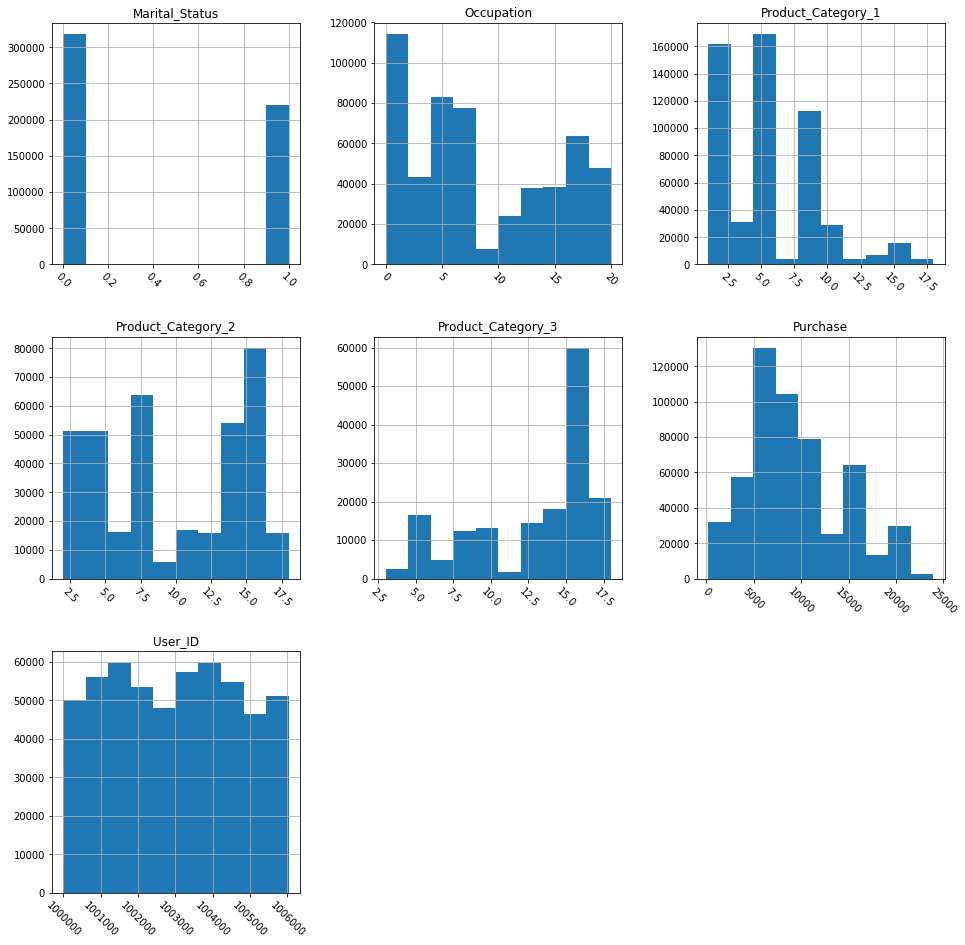

In [72]:
df.hist(figsize=(16,16), xrot=-45)
plt.show()

In [73]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


# Distribution of categorical data

In [74]:
df.describe(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


# Bar plots for categorical data

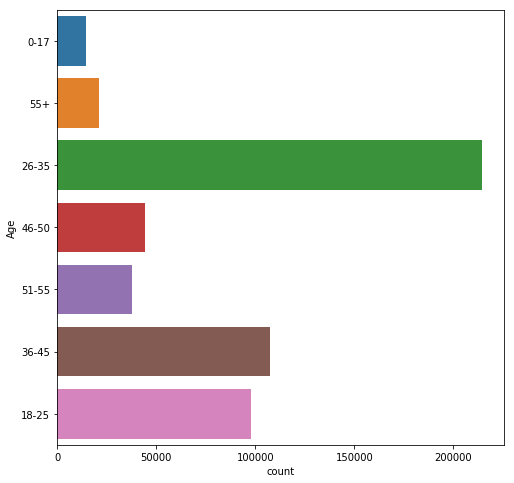

In [75]:
plt.figure(figsize = (8,8))
sns.countplot(y='Age',data = df)

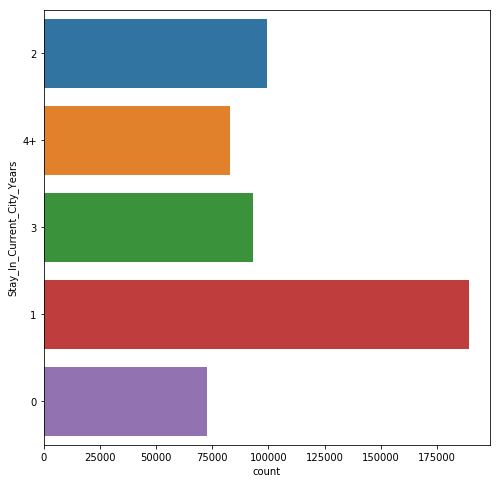

In [76]:
plt.figure(figsize = (8,8))
sns.countplot(y='Stay_In_Current_City_Years',data = df)

# Segmentations

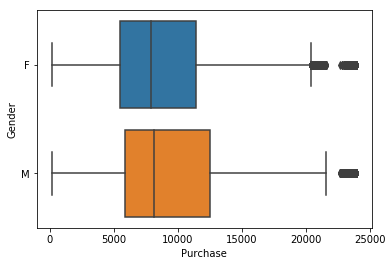

In [77]:
sns.boxplot(y='Gender', x='Purchase', data = df)

# Comparing two genders across other features

In [78]:
df.groupby('Gender').mean()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,,,,,,,
F,1.003088e+06,6.742672,0.417733,5.595445,10.007969,12.452318,8809.761349
M,1.002961e+06,8.519705,0.405883,5.197748,9.789072,12.732924,9504.771713


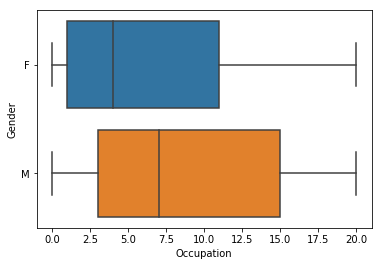

In [79]:
sns.boxplot(y='Gender', x='Occupation', data = df)

In [80]:
df.groupby('Gender').agg([np.mean,np.std])

User_ID              Occupation           Marital_Status  \
                mean          std       mean       std           mean   
Gender                                                                  
F       1.003088e+06  1774.236455   6.742672  6.242116       0.417733   
M       1.002961e+06  1693.251916   8.519705  6.554518       0.405883   

                 Product_Category_1           Product_Category_2            \
             std               mean       std               mean       std   
Gender                                                                       
F       0.493188           5.595445  3.476495          10.007969  4.872295   
M       0.491063           5.197748  3.830816           9.789072  5.153046   

       Product_Category_3               Purchase               
                     mean       std         mean          std  
Gender                                                         
F               12.452318  4.126782  8809.761349  4721.440055  
M               12.732924  4.121502  9504.771713  5051.057256

In [81]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [82]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257
Purchase,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000


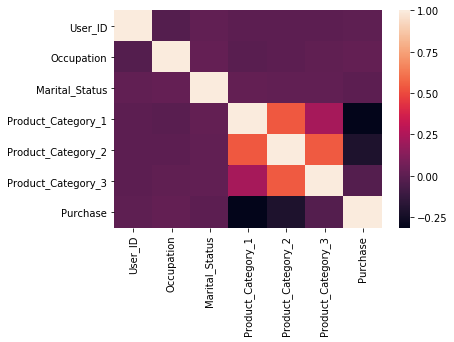

In [83]:
sns.heatmap(df.corr())

In [84]:
corr = df.corr()
print (corr['Purchase'].sort_values(ascending=False)[:4], '\n') #top 15 v
print ('----------------------')
print (corr['Purchase'].sort_values(ascending=False)[-3:]) #last 5 values`

Purchase          1.000000
Occupation        0.021104
User_ID           0.005389
Marital_Status    0.000129
Name: Purchase, dtype: float64 

----------------------
Product_Category_3   -0.022257
Product_Category_2   -0.209973
Product_Category_1   -0.314125
Name: Purchase, dtype: float64


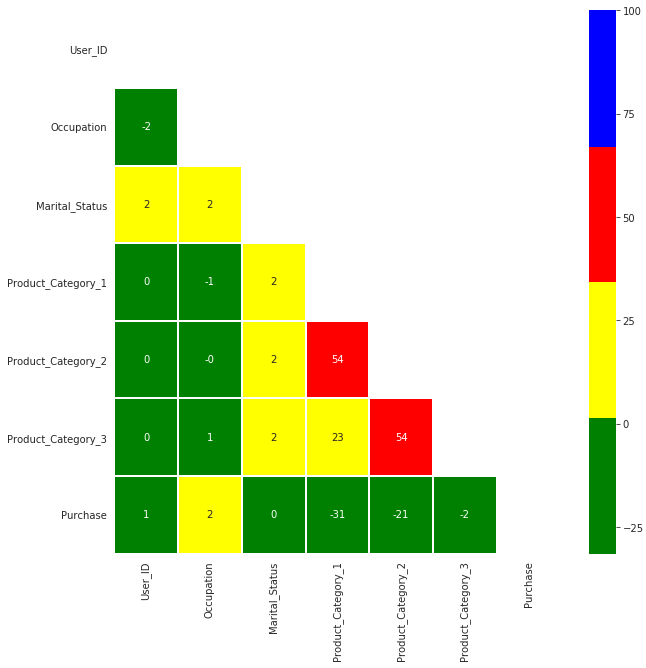

In [85]:
from matplotlib.colors import ListedColormap
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]= True
plt.figure(figsize = (10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100,mask =mask, fmt = '.0f',
                     annot = True, lw=1,cmap =ListedColormap(["green","yellow","red","blue"]))

# Data Cleaning

# Drop any duplicate

In [86]:
df = df.drop_duplicates()
df.shape

(537577, 12)

In [87]:
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [88]:
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [89]:
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [90]:
df.Product_Category_2.fillna(9, inplace = True)

In [91]:
df.Product_Category_2.unique()

array([ 9.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12., 10.,
       17., 13.,  7., 18.])

# Removing Outliers

In [92]:
# Outliers can cause problems with certain types of models.
# Boxplots are a nice way to detect outliers
# Let's start with a box plot of your target variable, since that's what you're actually trying to predict

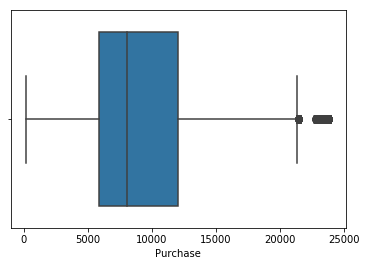

In [93]:
sns.boxplot(df.Purchase)

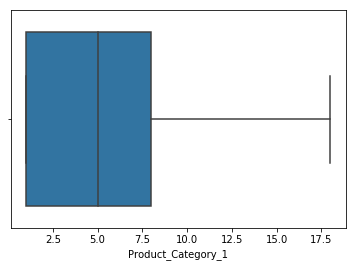

In [96]:
sns.boxplot(df.Product_Category_1)


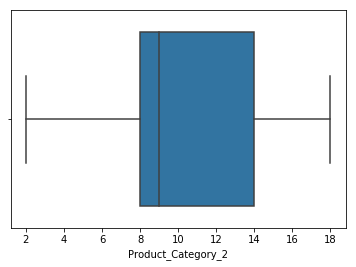

In [95]:
sns.boxplot(df.Product_Category_2)


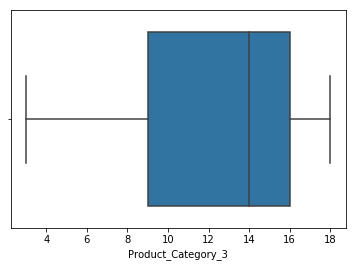

In [97]:
sns.boxplot(df.Product_Category_3)

# Label missing categorical data

In [98]:
# Display number of missing values by categorical feature
df.select_dtypes(include=['object']).isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
City_Category                 0
Stay_In_Current_City_Years    0
dtype: int64

# Flag and Fill missing numerical data

In [99]:
# Display number of missing values by numeric feature
df.select_dtypes(exclude=['object']).isnull().sum()

User_ID                    0
Occupation                 0
Marital_Status             0
Product_Category_1         0
Product_Category_2         0
Product_Category_3    373299
Purchase                   0
dtype: int64

In [101]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mean())
df.select_dtypes(exclude=['object']).isnull().sum()

User_ID               0
Occupation            0
Marital_Status        0
Product_Category_1    0
Product_Category_2    0
Product_Category_3    0
Purchase              0
dtype: int64

In [102]:
# Before we move on to the next module, let's save the new dataframe we worked hard to clean.
# This makes sure we don't have to re-do all the cleaning after clossing the session.
# Save cleaned dataframe to new file
df.to_csv(r'C:\Users\Vasireddy\Desktop\cleaneddf.csv', index=False)

# Encode Dummy Variables

In [103]:
# Machine learning algorithms cannot directly handle categorical features. Specifically, they cannot handle text values.
# Therefore, we need to create dummy variables for our categorical features.
# Dummy variables are a set of binary (0 or 1) features that each represent a single class from a categorical feature.
# Create a new dataframe with dummy variables for for our categorical features.

In [104]:
df = pd.get_dummies(df, columns=['Gender', 'Age', 'City_Category'])

In [105]:
# Note: There are many ways to perform one-hot encoding, 
# you can also use LabelEncoder and OneHotEncoder classes in SKLEARN or use the above pandas function.

In [106]:
df.head()

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,...,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,10,2,0,3,9.0,12.66984,8370,1,...,1,0,0,0,0,0,0,1,0,0
1,1000001,P00248942,10,2,0,1,6.0,14.00000,15200,1,...,1,0,0,0,0,0,0,1,0,0
2,1000001,P00087842,10,2,0,12,9.0,12.66984,1422,1,...,1,0,0,0,0,0,0,1,0,0
3,1000001,P00085442,10,2,0,12,14.0,12.66984,1057,1,...,1,0,0,0,0,0,0,1,0,0
4,1000002,P00285442,16,4+,0,8,9.0,12.66984,7969,0,...,0,0,0,0,0,0,1,0,0,1


In [107]:
df.to_csv(r'C:\Users\Vasireddy\Desktop\analyticaldf.csv', index=None)

# Machine Learning

# Data Preparation

In [108]:
df = pd.read_csv("analyticaldf.csv")

In [109]:
y = df.Purchase
x = df.drop('Purchase', axis = 1)

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [114]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(430061, 20) (107516, 20) (430061,) (107516,)


# Data Standardization

In [115]:
# In Data Standardization we perform zero mean centring and unit scaling; i.e. 
# we make the mean of all the features as zero and the standard deviation as 1.
# hus we use mean and standard deviation of each feature.
# It is very important to save the mean and standard deviation for each of the feature from the training set,
# because we use the same mean and standard deviation in the test set.

In [ ]:
train_mean = x_train.mean()
train_std = x_train.std()

In [ ]:
## Standardize the train data set
x_train = (x_train - train_mean) / train_std

In [ ]:
## Check for mean and std dev.
x_train.describe()

In [ ]:
## Note: We use train_mean and train_std_dev to standardize test data set
x_test = (x_test - train_mean) / train_std

In [ ]:
## Check for mean and std dev. - not exactly 0 and 1
x_test.describe()

# Baseline Model

In [ ]:
# In this model, for every test data point, we will simply predict the average of the train labels as the output.
# We will use this simple model to perform hypothesis testing for other complex models.

In [ ]:
## Predict Train results
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [ ]:
## Predict Test results
y_pred = np.ones(y_test.shape[0])*y_train.mean()
from sklearn.metrics import r2_score

In [ ]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

In [ ]:
print("Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))